In [1]:
from forse.networks.dcgan import *
import matplotlib.pyplot as plt
from forse.tools import *

Using TensorFlow backend.


In [2]:
dir_data = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/'
dir_models = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/weights/'

In [5]:
dcgan = DCGAN(output_directory='./', img_size=(320, 320))
dcgan.generator = load_model(dir_models+'forse_generator_T.h5')

/global/homes/k/krach/usr/python_prefix_3.7/lib/python3.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [6]:
patch_file = 'GNILC_Thr12_Tlr80_350patches_20x20deg_Npix320_mask8.npy'
Ss_ratio,Ls = np.load(dir_data+patch_file)
npatches = len(Ls)
Ss_ratio_scaled = np.copy(Ss_ratio)
Ls_scaled = np.copy(Ls)
Ss_ratio_edges = []
for i in range(0, npatches):
    Ss_ratio_scaled[i], Ymin, Ymax = rescale_min_max(Ss_ratio[i], return_min_max=True)
    Ls_scaled[i], Xmin, Xmax = rescale_min_max(Ls[i], return_min_max=True)
    Ss_ratio_edges.append([Ymin, Ymax])
Ls_scaled = Ls_scaled.reshape((npatches, 320, 320, 1))
Ss_ratio_scaled = Ss_ratio_scaled.reshape((npatches, 320, 320, 1))

In [7]:
NNout = dcgan.generator.predict(Ls_scaled)

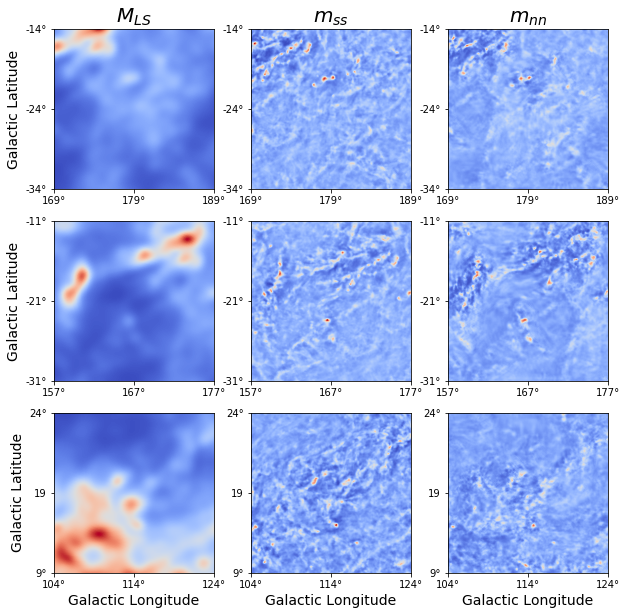

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(331)
plt.imshow(Ls_scaled[12,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$M_{LS}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(332)
plt.imshow(Ss_ratio_scaled[12,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$m_{ss}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(333)
plt.imshow(NNout[12,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$m_{nn}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(334)
plt.imshow(Ls_scaled[238,:, :,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )
plt.ylabel('Galactic Latitude', fontsize=14)


plt.subplot(335)
plt.imshow(Ss_ratio_scaled[238,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(336)
plt.imshow(NNout[238,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(337)
plt.imshow(Ls_scaled[76,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(338)
plt.imshow(Ss_ratio_scaled[76,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )

plt.subplot(339)
plt.imshow(NNout[76,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )
plt.savefig('T_patches_IO.pdf')


In [9]:
Ss_ratio_edges = np.array(Ss_ratio_edges)
NNout_normed = np.copy(NNout)
for i in range(npatches):
    NNout_normed[i] = (NNout_normed[i]/np.std(NNout_normed[i])*np.std(Ss_ratio[i]))
    NNout_normed[i] = (NNout_normed[i]-np.mean(NNout_normed[i])+np.mean(Ss_ratio[i]))

([<matplotlib.axis.XTick at 0x2aabaf359b90>,
 <a list of 3 Text xticklabel objects>)

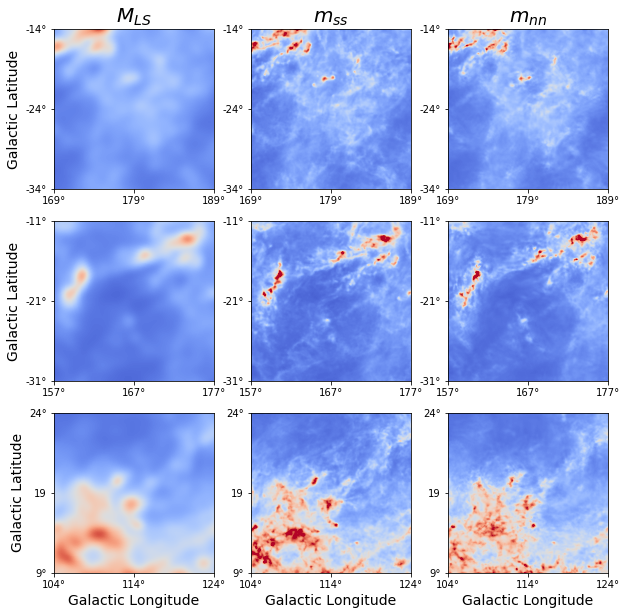

In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(331)
cf = 1e3
expl = 12
vmax = 20
plt.imshow(Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.title(r'$M_{LS}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(332)
plt.imshow(Ss_ratio[expl,:,:]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.title(r'$m_{ss}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(333)
plt.imshow(NNout_normed[expl,:,:,0]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.title(r'$m_{nn}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(334)
expl =238
vmax = 25
plt.imshow(Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(335)
plt.imshow(Ss_ratio[expl,:,:]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(336)
plt.imshow(NNout_normed[expl,:,:,0]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(337)
expl = 76
vmax = 12
plt.imshow(Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(338)
plt.imshow(Ss_ratio[expl,:,:]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )

plt.subplot(339)
plt.imshow(NNout_normed[expl,:,:,0]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )